In [1]:
pip install pgm_reader #install pgm_reader python package to read .pgm image files

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#install'


# Reading and displaying Images

Codec: b'P2\n'
Reading P2 maps
Codec: b'P2\n'
Reading P2 maps


Text(0.5, 1.0, 'Fourier_transform')

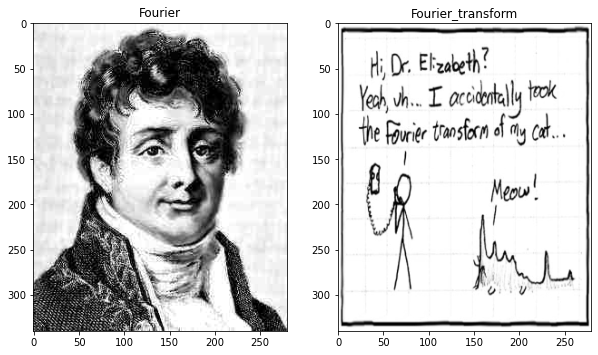

In [2]:
from pgm_reader import Reader
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.subplots(1,2,figsize=(10,10))

fourier = 'fourier.pgm'
reader = Reader()
fourier_img = reader.read_pgm(fourier)
plt.subplot(1,2,1)
plt.imshow(fourier_img,'gray')
plt.title('Fourier')

fourier_transform = 'fourier_transform.pgm'
reader = Reader()
fourier_transform_img = reader.read_pgm(fourier_transform)
plt.subplot(1,2,2)
plt.imshow(fourier_transform_img,'gray')
plt.title('Fourier_transform')

# 2D-DFT using row-column decomposition

The 2D-DFT of an image $f(m,n)$ is calculated as $F(k,l)=\frac{1}{\sqrt mn}\sum_{m=0}^{N-1}\sum_{n=0}^{N-1}\,f(m,n)\exp(-j2\pi(mk+ln)/N)$

If we split the exponential term and seperate them as per m,n adjust the summations accordingly then its like first performing N- 1D-DFTs along n and then performing  N-1D-DFTs on obtained result along m. 

In [3]:
import numpy as np
from numpy.fft import fftshift, fft #using fft to perform 1D-DFT

def DFT_2D(image):
    m, n = np.shape(image) 
    row_transform = fft(image, axis=1) #1D DFT along n
    final_transform = fft(row_transform, axis=0) #performing 1D-DFT of row_transform along m
    final_transform = fftshift(final_transform) #adjusting the DFT to centre for proper visualization
    mag = np.abs(final_transform) #magnitude response
    phase = np.zeros_like(final_transform)
    phase[mag!=0] = final_transform[mag!=0]/mag[mag!=0]
    return mag/(np.sqrt(m*n)), phase #normalizing magnitude so that transform is unitary

# 2D-IDFT 
Inverse DFT is performed same as DFT i.e it is like performing DFT of DFT of an image

In [4]:
def IDFT_2D(magnitude, phase):
    image = magnitude*phase
    m, n = np.shape(image)
    image = fftshift(image)
    row_transform = fft(image, axis=1)
    final_transform = fft(row_transform, axis=0)
    mag = np.abs(final_transform)
    # by the property that taking DFT of the DFT of an image results in a flipped image
    mag = mag[::-1, ::-1] #unflipping
    return mag/(np.sqrt(m*n))

# DFT by interchanging Magnitude and Phase responses
This function is defined to find the new images after interchanging the magnitude and phase responses of image 1 and 2

In [5]:
def mag_phase_interchange_dft(img1, img2):
    mag1, phase1 = DFT_2D(img1)
    mag2, phase2 = DFT_2D(img2)
    # get the resulting images by flipping the 
    # magnitudes and phases of the DFTs
    img3 = IDFT_2D(mag1, phase2)
    img4 = IDFT_2D(mag2, phase1)
    return img3, img4

# Plotting

Text(0.5, 1.0, 'Phase response of Fourier_transform')

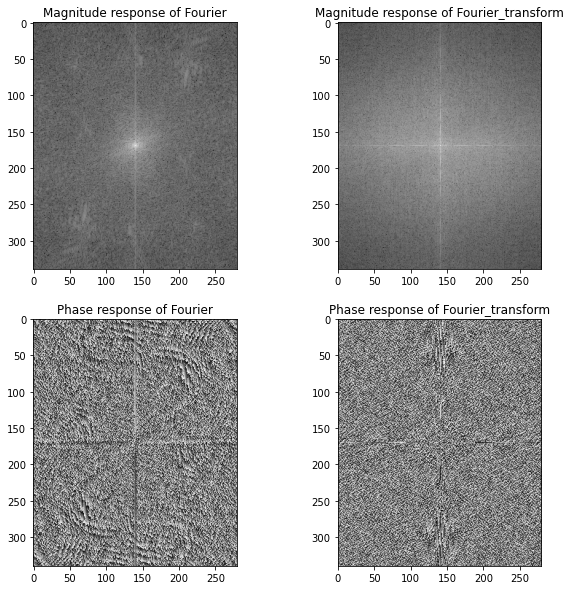

In [6]:
plt.subplots(2,2,figsize=(10,10))

mag_fourier,phase_fourier = DFT_2D(fourier_img)
mag_fourier_transform,phase_fourier_transform=DFT_2D(fourier_transform_img)

plt.subplot(2,2,1)
plt.imshow(np.log10(mag_fourier),'gray')
plt.title('Magnitude response of Fourier')

plt.subplot(2,2,2)
plt.imshow(np.log10(mag_fourier_transform),'gray')
plt.title('Magnitude response of Fourier_transform')

plt.subplot(2,2,3)
plt.imshow(np.angle(phase_fourier),'gray')
plt.title('Phase response of Fourier')

plt.subplot(2,2,4)
mag_fourier_transform,phase_fourier_transform=DFT_2D(fourier_transform_img)
plt.imshow(np.angle(phase_fourier_transform),'gray')
plt.title('Phase response of Fourier_transform')

Text(0.5, 1.0, 'DFT of new image with phase dominance of fourier')

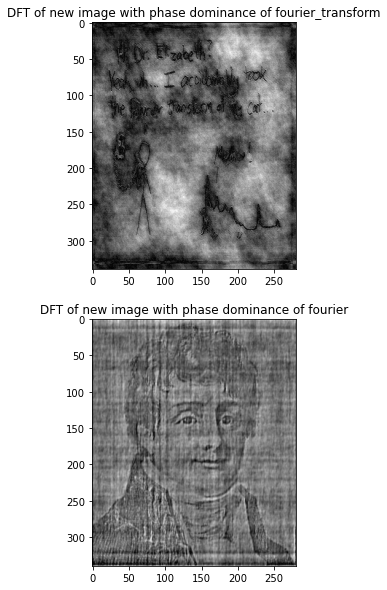

In [7]:
mag1_phase2,mag2_phase1=mag_phase_interchange_dft(fourier_img,fourier_transform_img)
plt.subplots(2,1,figsize=(10,10))

plt.subplot(2,1,1)
plt.imshow(mag1_phase2,'gray')
plt.title('DFT of new image with phase dominance of fourier_transform')

plt.subplot(2,1,2)
plt.imshow(mag2_phase1,'gray')
plt.title('DFT of new image with phase dominance of fourier')


The phase dominance effect can be clearly seen from the above images.
In the first case where magnitude of fourier and phase of fourier_transform is considered the resultant image looks more similar to fourier_transform i.e as the phase of fourier_transform is considered that is more dominant similarly for the second case